### HDBSCAN

In [52]:
"""
! pip install hdbscan
"""

'\n! pip install hdbscan\n'

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn.datasets as data

import hdbscan
from sklearn.metrics import silhouette_score


# Generate synthetic dataset with 4 clusters
X, _ = data.make_blobs(n_samples=500,
                        n_features=2,
                        centers=4,
                        cluster_std=1,
                        center_box=(-10.0, 10.0),
                        shuffle=True,
                        random_state=88)  # For reproducibility

# Normalize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Fit HDBSCAN model
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10,  gen_min_span_tree=True)
clusterer.fit(X)

# Get cluster labels (a.k.a. y_pred_hdbscan )
labels = clusterer.labels_

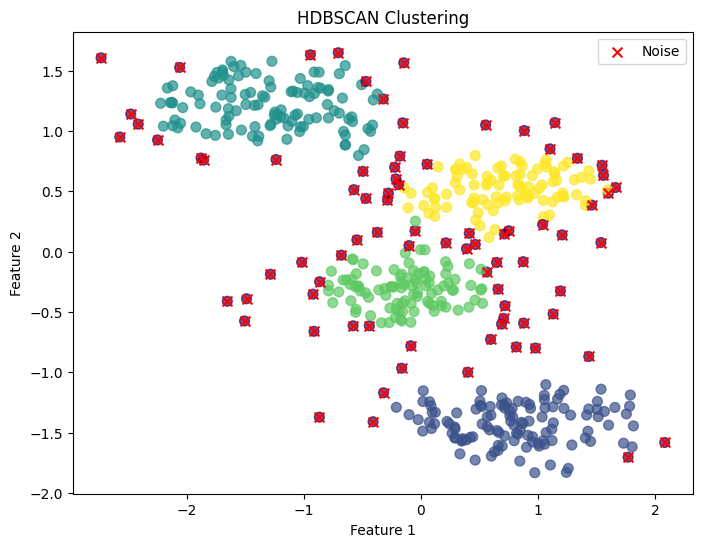

In [54]:

## Plotting the clusters
plt.figure(figsize=(8, 6))
# Plot the points with their cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
# Mark noise (points labeled as -1)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='red', s=50, label='Noise', marker='x')
plt.title("HDBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [55]:
# Output cluster labels
print("Cluster labels for each point:")
print(labels)
# Notice that datapoints with label -1 are the ones labeled as noise

Cluster labels for each point:
[ 0  1  2  2 -1 -1  0  1  3  1  2  3  0  3  3 -1  2  1  0  2  1  1 -1  2
 -1  3  1 -1 -1 -1  1  3  2 -1  2  2  0  3  0  0  0  0  0 -1  1  2  1 -1
  2 -1  3 -1  0  1 -1  1  1  1  0  1  0  0  1  1  0  2 -1  0  2  2  2  2
  3  3  0  0 -1  1 -1 -1  2  3 -1  1  1  0 -1  3 -1  0  0  2  2  1  0  3
  3  1  1  1  3  3  1  0  0  0  1  1  0  2 -1 -1  0  1  0 -1  0  3  0  2
 -1  2  0  1  1  0  0  1  0  1  0  3  3  0  1  3  1  1  2  3  0  0  1  2
  0  1  3  3  3  2  0  0  1  1  0  2  2  0  0  0  3  1  1  0  2  1  0  0
  2  0  3  3  1  3  2  3  0  1  3  0 -1  3  3  3  0  3 -1  1  2  3  0  1
  1 -1  1 -1  3  2  2  1 -1  1 -1  1 -1  1  0  1  0  2  1 -1  0  3  2  0
  2 -1  2  0  1  3  3  3  2  0 -1  0  3 -1  0  3  2  1 -1  3 -1  2  2  3
  3  0  0 -1  3  2  1  2 -1  2  2  0  0  3  3  3  2  2  2  0  1  0  0  0
  3  0  0  2  0  0 -1  0  0  3 -1  1  1  2  0  2 -1  3  2  3  3  2  0  0
  2  1  0  2  0 -1  3  1  1  3 -1  1  3  0  1  3  0  3  3  1  2  1 -1  1
  0  0  3  2  3  1  

---

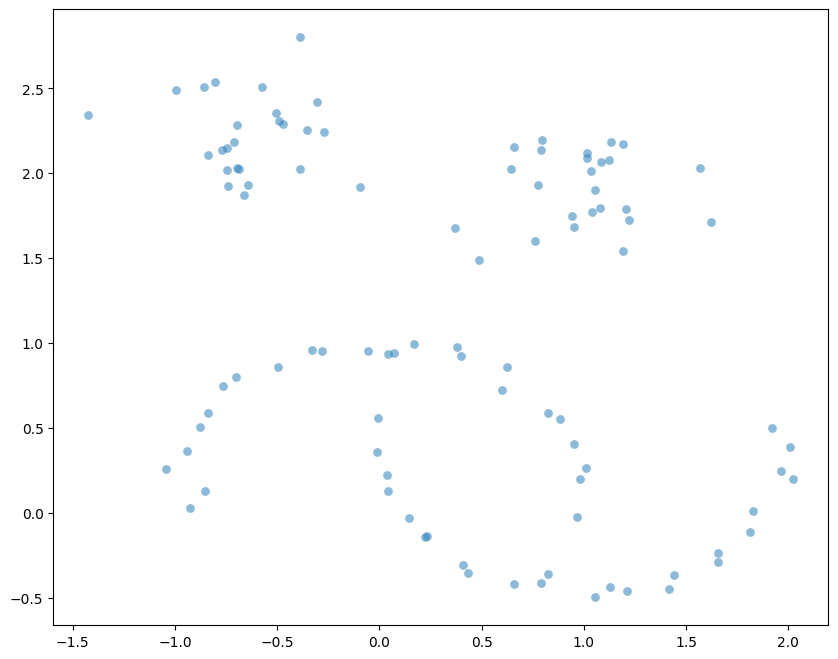

In [56]:
# Here I also report the same example seen in the theoretical part

# Generate synthetic data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75, 2.25), (1.0, 2.0)], cluster_std=0.25)
# Combine the data
test_data = np.vstack([moons, blobs])

# Show the datapoints
plt.figure(figsize=(10, 8))
plt.scatter(test_data.T[0], test_data.T[1], alpha=0.5, s=40, linewidths=0)
plt.show()


In [57]:
# Fit HDBSCAN model
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

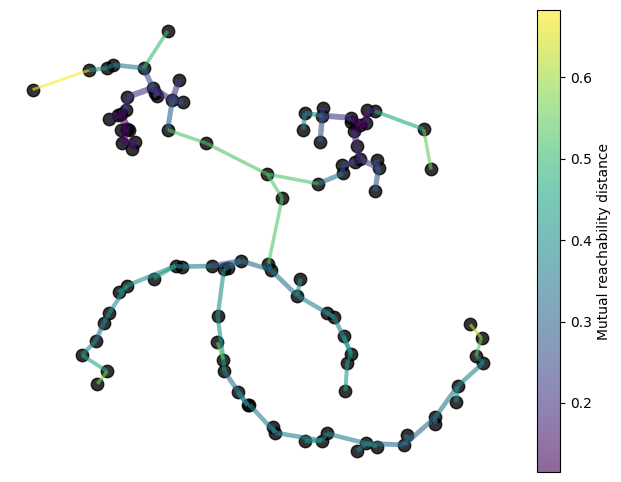

In [58]:
# Plot the Minimum Spanning Tree

plt.figure(figsize=(8, 6))
clusterer.minimum_spanning_tree_.plot(
    edge_cmap='viridis',  # Color the edges based on distance
    edge_alpha=0.6,       # Make edges semi-transparent for better readability
    node_size=80,        # Increase node size for visibility
    edge_linewidth=2,     # Increase edge line width for clarity
)

plt.axis('off') # Improve the aesthetics by removing axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<Axes: ylabel='distance'>

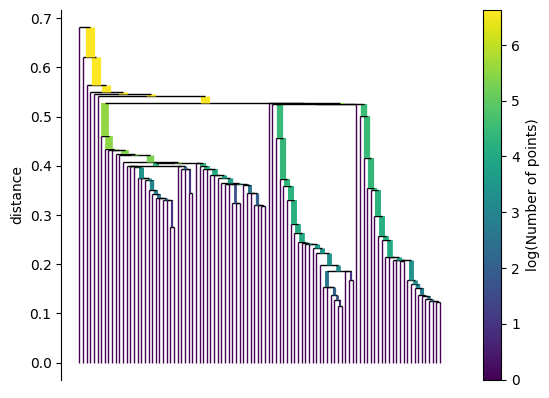

In [59]:
# Plot the cluster hierarchy
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

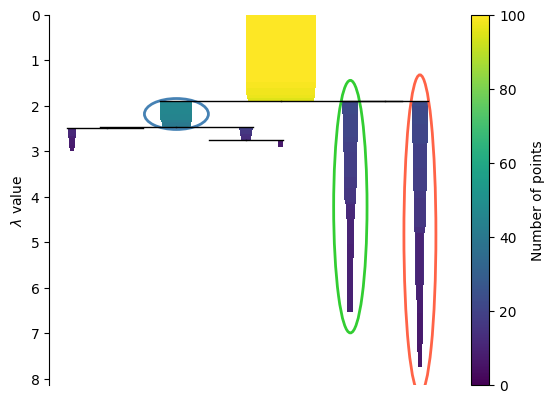

In [60]:
# Condense the cluster tree and extract the clusters
palette=["#4682B4", "#32CD32", "#FF6347"]
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=palette)

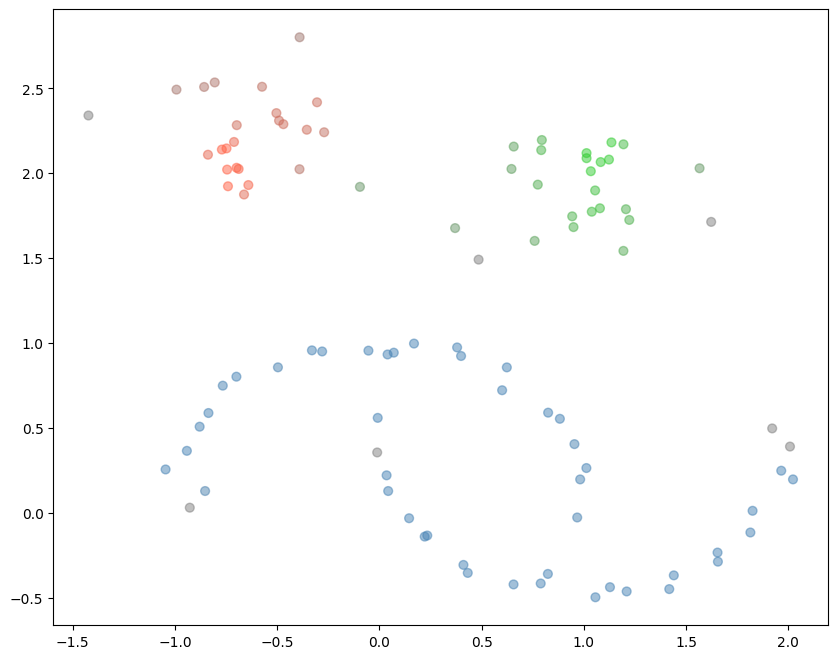

In [61]:
# At the end we can plot back our original datapoints choosing a color for points based on cluster label, and
# desaturating that color according the strength of membership (and make unclustered points pure gray).

# Function to adjust color saturation
def desaturate_color(color, sat):
    """ Desaturate a color by mixing it with gray, controlled by sat (saturation) """
    grey = np.array([0.5, 0.5, 0.5])  # A neutral grey color
    return (1 - sat) * grey + sat * np.array(color)
palette_rgb = [mcolors.to_rgb(c) for c in palette]


# Assign colors to clusters based on labels and strength of membership
cluster_colors = [
    desaturate_color(palette_rgb[col % len(palette_rgb)], sat) if col >= 0 else (0.5, 0.5, 0.5)
    for col, sat in zip(clusterer.labels_, clusterer.probabilities_)
]
plt.figure(figsize=(10, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=cluster_colors, s=40, alpha=0.5)
plt.show()